### 데이터의 시각화
1. 사용하는 라이브러리 matplotlib
2. 라인, 바, 산점도, 히스토그램 그래프 시각화
3. 그 외의 그래프가 여러 종류가 존재

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot([1,2,3,4])
plt.xlabel("X")
plt.show()

- subplot()
    - 한 영역에 여러개의 그래프를 그려주기위한 함수
    - subplot(행의 개수, 열의 개수, 위치)

In [ ]:
plt.subplot(1,2,1)
plt.plot([1,2,3,4])
plt.subplot(1,2,2)
plt.plot([4,3,2,1])
plt.show()

In [ ]:

fig, axes = plt.subplots(2,2)
axes[0][0].plot([1,2,3,4])
axes[0][1].plot([4,3,2,1])
axes[1][0].plot([1,2,2,1])
axes[1][1].plot([3,4,2,1])
plt.show()

- 그래프를 그릴때 주의 할 점
    - y축의 값만 입력하는 경우 - 문제는 경우가 거의 존재하지 않는다. 
    - x축과 y축의 값을 같이 입력하는 경우
        - x의 값과 y값의 위치를 정확하게 대입
        - x의 개수와 y의 개수가 일치

In [ ]:
x = [1,2,3,4]
y = [4,3,2,1]
plt.plot(x, y)
plt.show()

In [ ]:
## x축의 이름 , y축의 이름, 그래프의 이름
plt.plot([1,2,3,4])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title('title')
plt.show()


In [ ]:
plt.plot([1,2,3,4], label="acending")
plt.plot([4,3,2,1], label="descending")
plt.legend(loc=5)
plt.show()

In [ ]:
## 한글이 깨지는 현상을 막기 위해 폰트 변경
import platform

if platform.system() == "Darwin":   # Mac 인 경우
    plt.rc('font', family='AppleGothic')
else :
    plt.rc('font', family='Malgun Gothic')

In [ ]:
plt.plot([1,2,3,4])
plt.xlabel("x축")
plt.show()

In [ ]:
## Finance-Datareader
!pip install finance-datareader

In [ ]:
!pip install bs4

In [ ]:
import FinanceDataReader as fdr

In [ ]:
kospi = fdr.DataReader('ks11', '2019')
kospi.to_excel('kospi.xlsx')
kospi.head()

In [ ]:
import pandas as pd

In [ ]:
kospi = pd.read_excel("kospi.xlsx", index_col='Date')

In [ ]:
# 그래프의 사이즈를 조절
plt.figure(figsize=(14,6))
# grid 추가
plt.grid(True, axis='y')
plt.plot(kospi['Close'].head(20), marker='o')
plt.xlabel("날짜")
plt.ylabel("종가")
plt.show()

- 바형 그래프 
    - bar() 함수를 이용하여 그래프를 출력
    - bar(x값, y값)
    - x값이 존재하지 않으면 에러 발생

In [ ]:
plt.bar([1,2,3,4], [4,3,2,1])
plt.show()

In [ ]:
mean_kospi_2020 = kospi.loc['2020'].resample('MS').mean()
mean_kospi_2020

In [ ]:
## x축은 'XXXX년XX월' 표시
mean_kospi_2020.index[0].strftime('%Y년%m월')

x = []
for i in mean_kospi_2020.index:
    x.append(i.strftime("%Y년%m월"))

x


In [ ]:
x = mean_kospi_2020.index.strftime("%Y년%m월")

In [ ]:
plt.barh(x, mean_kospi_2020['Volume'])
# 지수 표현식은 일반 표현식으로 변경
plt.ticklabel_format(axis='x', style='plain')
plt.show()

- 히스토그램
    - 데이터의 개수를 표현하는 바 그래프

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
plt.hist(data, bins = 2)
plt.show()

In [ ]:
kospi.head()

In [ ]:
## kospi에서 변동율 파생변수 생성
## 변동률 = (종가-시가)/시가 * 100
kospi["변동률"] = (kospi['Close'] - kospi['Open']) / kospi['Open'] * 100
kospi.head()

In [ ]:
plt.rc("axes", unicode_minus = False)   # 음수를 표시
plt.grid()
plt.hist(kospi["변동률"], bins=20)
plt.show()

In [ ]:
## candlestick
!pip install mplfinance

In [ ]:
import mplfinance as mpf

In [ ]:
mpf.plot(data = kospi.loc['2020-12'], type='candle')

In [ ]:
marketcolor = mpf.make_marketcolors(
    up = 'r', 
    down = 'b', 
    edge = 'inherit', 
    wick = 'inherit'
)

style = mpf.make_mpf_style(
    base_mpf_style = 'starsandstripes', 
    marketcolors = marketcolor, 
    gridaxis = 'both', 
    y_on_right = True
)

mpf.plot(data = kospi.loc['2020-12'], type='candle', style=style)

In [ ]:
## csv 파일 로드 
df = pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding='euc-kr')

In [ ]:
## 지수표현 없이 출력하기 
pd.options.display.float_format = '{:2f}'.format

In [ ]:
df.head()

### 문제!!!

2. 각 컬럼의 이름을 변경 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열로 변경
4. index를 기준년월 변경
1. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크

In [ ]:
## to_datetime(기준이되는 데이터, format = "기준이 되는 데이터의 형식")
## ex) 201901 -> 2019는 년도 , 01 월, 4자리수의 년도는 %Y,  월은 %m
pd.to_datetime(201901, format='%Y%m')

In [ ]:
df.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [ ]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [ ]:
df.set_index('기준년월', inplace=True)

In [ ]:
# df.index = df['기준년월']

In [140]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,
2019-01-01,백화점,남자,1,1,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000
2019-01-01,백화점,남자,20,45173,4747711001.000000
2019-01-01,백화점,남자,30,271858,27918261543.000000
2019-01-01,백화점,남자,40,391109,37911486656.000000


In [141]:
df[(df[['총이용건수', '총이용금액']] < 0).any(1)]

C:\Users\moons\AppData\Local\Temp\ipykernel_7356\2262157164.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[(df[['총이용건수', '총이용금액']] < 0).any(1)]


,업종,성별,연령대,총이용건수,총이용금액
기준년월,,,,,


In [ ]:
df['성별'].value_counts()

In [ ]:
df['연령대'].value_counts()

### 연습문제
1. 성별 컬럼의 데이터 값을 1은 남자, 2는 여자 변경
2. 연령대가 0인 값은 제외한 새로운 데이터프레임을 생성 df_2
3. 남, 녀 성별을 기준으로 연도별 건당 이용 금액의 평균이 몇인지 출력 & 시각화
4. 3번의 과정을 df로 한번 더 진행

In [ ]:
## case1 - for문을 이용해서 변경
for i in range(len(df["성별"])):
    if df["성별"][i] == 1:
        df["성별"][i] = '남자'
    else :
        df['성별'][i] = "여자"

In [ ]:
## case2 - apply()
df['성별'].apply(lambda x : "여자" if x == 2 else "남자")

In [ ]:
df.head()

In [ ]:
df['성별'].value_counts()

In [ ]:
df_2 = df[~(df['연령대'] == 0)]

In [ ]:
df_2["연도"] = df_2.index.strftime("%Y")

In [ ]:
df_2.head()

In [ ]:
print(type(df_2['업종']))
print(type(df_2.index))

In [ ]:
pivot = pd.pivot_table(df_2, index="연도", columns="성별", aggfunc='sum')["총이용금액"]

In [ ]:
pivot.plot.bar()

## 온라인 카드 매출과 오프라인 카드매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
3. 1,2번과정에서 나온 데이터를 plot 그래프를 그려서 차이를 확인

In [ ]:
df.head()

In [ ]:
## 인덱스를 기준으로 그룹화 
group_df = df.groupby(df.index).sum()["총이용금액"]

In [129]:
df_online = pd.read_csv("../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv")

In [131]:
df_online.columns = ["기준년월", "성별", "연령대", "총이용건수", "총이용금액"]

In [ ]:
## 기준년월을 시계열 변경 - 인덱스로 변경
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format="%Y%m")
df_online.set_index("기준년월", inplace=True)
df_online.head()

In [136]:
group_df_online = df_online.groupby(df_online.index).sum()["총이용금액"]

In [ ]:
group_df_online

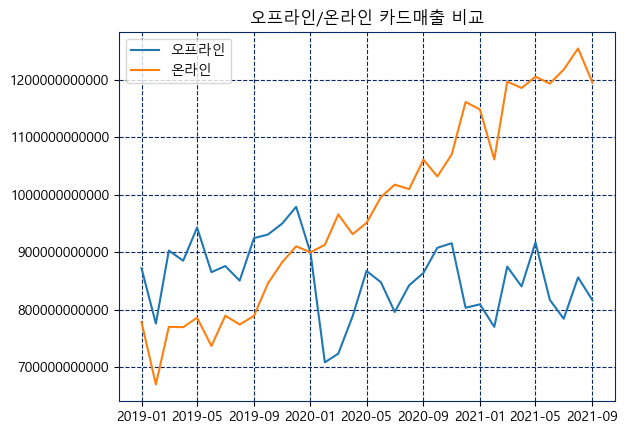

In [145]:

plt.ticklabel_format(axis='y', style='plain')
plt.plot(group_df, label="오프라인")
plt.plot(group_df_online, label="온라인")
plt.title("오프라인/온라인 카드매출 비교")
plt.legend()
plt.show()

### 2개의 데이터프레임을 결합
1. df_online에 업종 파생변수 생성 값은 "온라인"
2. df와 df_online 데이터프레임을 결합
3. 월별, 업종별로 총 이용금액이 어떻게 되는가??? 

In [146]:
## df_online에 업종 파생변수 추가
df_online['업종'] = "온라인"

In [147]:
total_df = pd.concat([df, df_online], axis=0)

In [148]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3299 entries, 2019-01-01 to 2021-09-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업종      3299 non-null   object 
 1   성별      3299 non-null   object 
 2   연령대     3299 non-null   int64  
 3   총이용건수   3299 non-null   int64  
 4   총이용금액   3299 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 154.6+ KB


In [ ]:
pivot_df = pd.pivot_table(
    total_df, 
    index=total_df.index, 
    columns="업종", 
    aggfunc='sum')["총이용금액"]

In [ ]:
pivot_df.plot()

In [152]:
pivot_df.columns

Index(['백화점', '슈퍼마켓', '온라인', '편의점', '할인점'], dtype='object', name='업종')

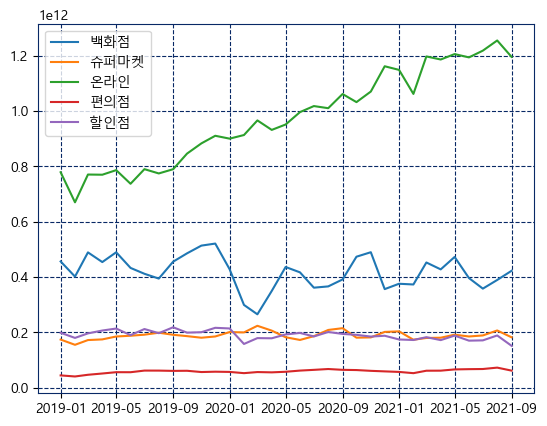

In [153]:
for col in pivot_df.columns:
    plt.plot(pivot_df[col], label=col)
plt.legend()
plt.show()

- total_df에서 온라인 업종에 남,녀의 카드매출이 월별로 어떻게 차이가 나는가?? 를 시각화하여 출력

In [155]:
total_df["성별"] = total_df['성별'].apply(
    lambda x : "남자" if (x == 1) | (x == "남자")  else "여자")

In [162]:
test = pd.pivot_table(
    total_df, 
    index = total_df.index, 
    columns=["업종", "성별"], 
    values= "총이용금액",
    aggfunc='sum'
)

In [ ]:
test

In [167]:
test2 = pd.pivot_table(
    total_df, 
    index = total_df.index, 
    columns=["성별", "업종"], 
    values= "총이용금액",
    aggfunc='sum'
)["남자"]

In [ ]:
test2

<AxesSubplot: xlabel='기준년월'>

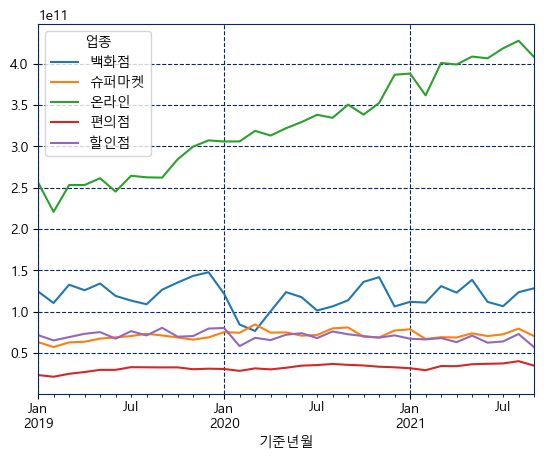

In [169]:
test2.plot()